In [ ]:
# Linear regression
# Regression is a type of supervised machine learing where output is dependent on the input.
# Also, in regression, output is continuous, whereas in classification, output is categorical.
# Linear regression shows correlation between dependent(y) and independent variable(x).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds=pd.read_csv("weight-height.csv")
ds

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
ds.shape
# Gives (rows,columns)

(10000, 3)

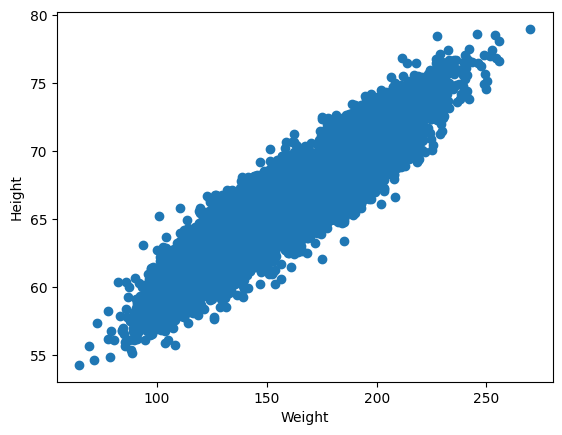

In [6]:
plt.scatter(ds["Weight"],ds["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [9]:
# Summary

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [10]:
ds.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [11]:
# Is any value missing?

ds.isnull().sum()

,0
Gender,0
Height,0
Weight,0


In [12]:
# Dividing dataset into dependent and independent features.

x=ds[["Weight"]] # independent feature
y=ds["Height"] # dependent feature

In [14]:
x.shape
y.shape

(10000,)

In [15]:
# Training and testing the dataset.

from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [20]:
X_train.shape, X_test.shape

((8000, 1), (2000, 1))

In [21]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [22]:
# Standarization and scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)
# fit transfrom only in training data.
# transform only intesting data.
X_train

array([[-1.14063009],
       [-1.80808334],
       [-1.16008055],
       ...,
       [ 0.56081417],
       [-0.24543139],
       [ 0.63576709]])

In [24]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.41510511],
       [-0.38241808],
       [ 1.77138419],
       ...,
       [ 1.23847861],
       [-0.63512057],
       [ 0.04235773]])

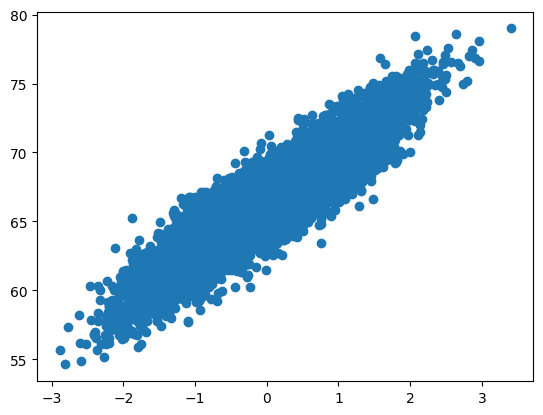

In [26]:
plt.scatter(X_train,y_train)
plt.show()

In [27]:
# Model Training
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
model.intercept_

66.35127451830004

In [30]:
model.coef_

array([3.54007823])

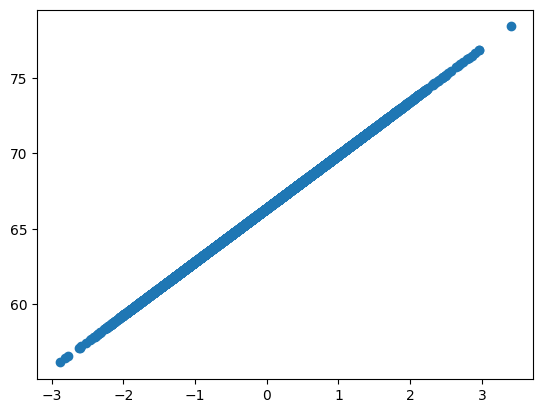

In [31]:
plt.scatter(X_train, model.predict(X_train))
plt.show()

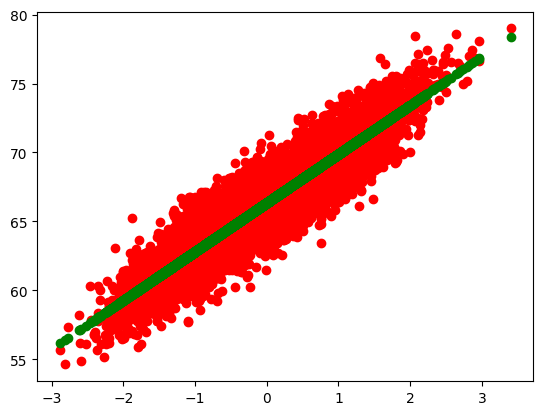

In [32]:
plt.scatter(X_train,y_train,c='r')
plt.scatter(X_train,model.predict(X_train),c='g')
plt.show()

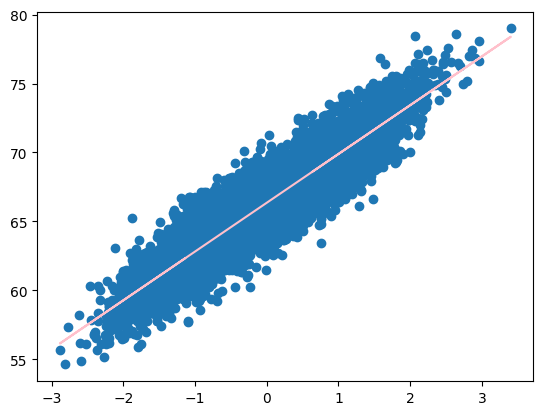

In [34]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),c="pink")
plt.show()

In [35]:
# Prediction for test data

y_pred_test=model.predict(X_test)
y_pred_test

array([71.3608573 , 64.99748459, 72.62211312, ..., 70.73558569,
       64.10289803, 66.50122419])

In [36]:
y_test

,Height
937,68.321453
9355,64.654718
2293,74.034598
192,69.728805
8675,64.579930
...,...
5624,62.011860
6005,60.666822
987,67.556183
6152,63.921176


In [37]:
# Performance Metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
mse=mean_squared_error(y_test,y_pred_test)
mse

2.194222686253052

In [39]:
mae=mean_absolute_error(y_test,y_pred_test)
mae

1.170326402264241

In [40]:
rmse=np.sqrt(mse)
rmse

1.4812908850907887

In [41]:
# Accuracy

from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_test)
score

0.8570631978725014

In [42]:
 scaler

StandardScaler()

In [43]:
model

LinearRegression()